two## Data Quality Report ADCP, Global Irminger Sea

Evaluation Date: 5/24/2018

Evaluator: Sergey Molodtsov

Review Summary

This report assesses the review the Global Irminger Sea Mooring ADCPs. I focus on data available from the moorings with installled ADCP, and compare the ADCP results between two different moorings during 2014 - 2018 time period (if data is available). 



## 1. Selected instruments included in this report
In this report, we will evaluate the ADCP from the Global Irminger Sea focusing on the full datasets available from Flanking Mooring A (GI03FLMA) and Mooring B (GI03FLMB). 

Instrument | Reference Designator | Method | Stream 
 -- | -- | -- | --
75 kHz ADCP | [GI03FLMA-RIM01-02-ADCPSL003](http://ooi.visualocean.net/instruments/view/GI03FLMA-RIM01-02-ADCPSL003) | recovered_inst | adcp_velocity_earth
75 kHz ADCP | [GI03FLMB-RIM01-02-ADCPSL007](http://ooi.visualocean.net/instruments/view/GI03FLMB-RIM01-02-ADCPSL007) | recovered_inst | adcp_velocity_earth



## 2. Time periods of interest
We will focus on the following time periods for evaluation:
* Sep 2014 to Aug 2017 - All of Deployment Flanking Mooring A
* Sep 2014 to Aug 2017 - All of Deployment Flanking Mooring B


In [0]:
import requests
import time
import pandas as pd
import datetime

## 3. Related Metadata
In this section, we will review some of metadata available in the system to make sure it is present and correct.

Before we get started, we need to set up our Python environment with some libraries, variables and functions we will need later in this report.

In [0]:
# API Information
USERNAME =''
TOKEN= ''
DATA_API = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'
VOCAB_API = 'https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv'
ASSET_API = 'https://ooinet.oceanobservatories.org/api/m2m/12587'

#GI03FLMA-RIM01-02-ADCPSL003
site = 'GI03FLMA'
node = 'RIM01'
instrument = '02-ADCPSL003'
method = 'recovered_inst'
stream = 'adcp_velocity_earth'



In [0]:
# Specify some functions to convert timestamps
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()

def ntp_seconds_to_datetime(ntp_seconds):
    return datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
  
def convert_time(ms):
  if ms != None:
    return datetime.datetime.utcfromtimestamp(ms/1000)
  else:
    return None


### 3a. ADCP Flanking Mooring A

Vocabulary Metadata
First, let's grab the basic vocabulary information (metadata) from the system to make sure we have the right instrument.

 

In [0]:
# Setup the API request url
data_request_url ='/'.join((VOCAB_API,site,node,instrument))
print data_request_url

# Grab the information from the server
r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
data = r.json()
data

https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/GI03FLMA/RIM01/02-ADCPSL003


[{u'@class': u'.VocabRecord',
  u'instrument': u'Velocity Profiler (75 kHz)',
  u'manufacturer': u'Teledyne RDI',
  u'maxdepth': 500.0,
  u'mindepth': 500.0,
  u'model': u'WorkHorse LongRanger Sentinel 75khz - inductive',
  u'refdes': u'GI03FLMA-RIM01-02-ADCPSL003',
  u'tocL1': u'Global Irminger Sea',
  u'tocL2': u'Flanking Subsurface Mooring A',
  u'tocL3': u'Mooring Riser',
  u'vocabId': 967}]

### Deployment Information
Next, let's grab some information about the deployments for this instrument.  We will grab all of the deployments available in the system since 2014 and then output the date ranges, latitude/longitude, asset ID, and sensor ID for each.  Note that the **reference designator** specified above represents the geographical location of an instrument across all deployments (e.g. the ADCP on the Irminger Moorings), the **Sensor ID** (and its Asset ID equivalent) represent the specific instrument used for a given deployment (i.e. a unique make, model, and serial numbered instrument).

In [0]:
# Setup the API request url
data_request_url = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2014-01-01T00:00:00.000Z',
  'endDT':'2018-01-01T00:00:00.000Z',
  'refdes':site+'-'+node+'-'+instrument,   
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
df

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,1538.0,1.0,59.76683,-39.84250,CGINS-ADCPSL-20503,2014-09-12 20:11:00,2015-08-18 10:41:00
1,2113.0,2.0,59.77067,-39.88010,CGINS-ADCPSL-23380,2015-08-18 23:48:00,2016-07-17 00:00:00
2,2427.0,3.0,59.81771,-39.84123,CGINS-ADCPSL-18353,2016-07-12 15:59:00,2017-08-12 11:36:00
3,2116.0,4.0,59.76990,-39.88600,CGINS-ADCPSL-23381,2017-08-08 15:59:00,None


### Annotations
Finally, let's pull any relevant annotations for the ADCP instrument at Mooring A.

In [0]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2017,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2018,1,1).strftime('%s'))*1000,
  'refdes':site+'-'+node+'-'+instrument,
}

r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df

,annotation,id,node,sensor,site,start,stop
0,Deployment 4: No data will be available via satellite telemetry for the remainder of the deployment. Data will be available when the mooring is recovered.,139.0,None,None,GI03FLMB,2017-10-11 00:00:00,None
1,Deployment 3: Instrument failed shortly after deployment due to the depletion of internal batteries.,697.0,RIM01,02-ADCPSL007,GI03FLMB,2016-07-26 11:28:00,2017-08-11 12:02:00


### 3b. ADCP Flanking Mooring B

Vocabulary Metadata
First, let's grab the basic vocabulary information (metadata) from the system to make sure we have the right instrument.

 

In [0]:
#GI03FLMA-RIM01-02-ADCPSL003

method = 'recovered_inst'
stream = 'adcp_velocity_earth'
site = 'GI03FLMB'
node = 'RIM01'
instrument = '02-ADCPSL007'

data_request_url ='/'.join((VOCAB_API,site,node,instrument))
print data_request_url

# Grab the information from the server
r = requests.get(data_request_url, auth=(USERNAME, TOKEN))
data = r.json()
data

https://ooinet.oceanobservatories.org/api/m2m/12586/vocab/inv/GI03FLMB/RIM01/02-ADCPSL007


[{u'@class': u'.VocabRecord',
  u'instrument': u'Velocity Profiler (75 kHz)',
  u'manufacturer': u'Teledyne RDI',
  u'maxdepth': 500.0,
  u'mindepth': 500.0,
  u'model': u'WorkHorse LongRanger Sentinel 75khz - inductive',
  u'refdes': u'GI03FLMB-RIM01-02-ADCPSL007',
  u'tocL1': u'Global Irminger Sea',
  u'tocL2': u'Flanking Subsurface Mooring B',
  u'tocL3': u'Mooring Riser',
  u'vocabId': 997}]

### Deployment Information
Next, let's grab some information about the deployments for this instrument.  We will grab all of the deployments available in the system since 2014 and then output the date ranges, latitude/longitude, asset ID, and sensor ID for each.  Note that the **reference designator** specified above represents the geographical location of an instrument across all deployments (e.g. the ADCP on the Irminger Moorings), the **Sensor ID** (and its Asset ID equivalent) represent the specific instrument used for a given deployment (i.e. a unique make, model, and serial numbered instrument).

In [0]:
# Setup the API request url
data_request_url = ASSET_API + '/events/deployment/query'
params = {
  'beginDT':'2014-01-01T00:00:00.000Z',
  'endDT':'2018-01-01T00:00:00.000Z',
  'refdes':site+'-'+node+'-'+instrument,   
}

# Grab the information from the server
r = requests.get(data_request_url, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
      'deployment': d['deploymentNumber'],
      'start': convert_time(d['eventStartTime']),
      'stop': convert_time(d['eventStopTime']),
      'latitude': d['location']['latitude'],
      'longitude': d['location']['longitude'],
      'sensor': d['sensor']['uid'],
      'asset_id': d['sensor']['assetId'],
    }, ignore_index=True)
df

,asset_id,deployment,latitude,longitude,sensor,start,stop
0,2427.0,1.0,59.71267,-39.23017,CGINS-ADCPSL-18353,2014-09-16 13:24:00,2015-08-20 12:56:00
1,2116.0,2.0,59.71823,-39.35362,CGINS-ADCPSL-23381,2015-08-21 17:11:00,2016-07-18 00:00:00
2,414.0,3.0,59.71547,-39.31479,CGINS-ADCPSL-21497,2016-07-13 15:49:00,2017-08-11 12:02:00
3,765.0,4.0,59.71660,-39.35210,CGINS-ADCPSL-21450,2017-08-07 15:49:00,None


### Annotations
Finally, let's pull any relevant annotations for the ADCP instrument at Mooring B.

In [0]:
ANNO_API = 'https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find'
params = {
  'beginDT':int(datetime.date(2014,1,1).strftime('%s'))*1000,
  'endDT':int(datetime.date(2018,1,1).strftime('%s'))*1000,
  'refdes':site+'-'+node+'-'+instrument,
}

r = requests.get(ANNO_API, params=params, auth=(USERNAME, TOKEN))
data = r.json()

df = pd.DataFrame() # Setup empty array
for d in data:
  df = df.append({
    'annotation': d['annotation'],
    'start': convert_time(d['beginDT']),
    'stop': convert_time(d['endDT']),
    'site': d['subsite'],
    'node': d['node'],
    'sensor': d['sensor'],
    'id': d['id']
  }, ignore_index=True)
pd.set_option('display.max_colwidth', -1) # Show the full annotation text
df

,annotation,id,node,sensor,site,start,stop
0,Deployment 4: No data will be available via satellite telemetry for the remainder of the deployment. Data will be available when the mooring is recovered.,139.0,None,None,GI03FLMB,2017-10-11 00:00:00,None
1,Deployment 3: Instrument failed shortly after deployment due to the depletion of internal batteries.,697.0,RIM01,02-ADCPSL007,GI03FLMB,2016-07-26 11:28:00,2017-08-11 12:02:00


## 4. The full dataset
Now let's take a look at a full dataset for each of the Moorings.

Login in at https://ooinet.oceanobservatories.org/ and obtain your <b>API username and API token</b> under your profile (top right corner), or use the credentials provided below.


In [0]:
username = 'OOIAPI-D8S960UXPK4K03'
token = 'IXL48EQ2XY'

Specify your inputs (flanking Mooring A).

In [0]:
#GI03FLMA-RIM01-02-ADCPSL003
subsite = 'GI03FLMA'
node = 'RIM01'
sensor = '02-ADCPSL003'
method = 'recovered_inst'
stream = 'adcp_velocity_earth'
beginDT = '2014-09-27T10:32:51.600Z'
endDT = '2018-05-20T10:32:51.600Z'

Request the data from flanking Mooring A.

In [0]:
base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'endDT':endDT,   
}
r = requests.get(data_request_url, params=params, auth=(username, token))
data_A = r.json()

Specify your inputs (flanking Mooring B).

In [0]:
#GI03FLMB-RIM01-02-ADCPSL007

subsite = 'GI03FLMB'
node = 'RIM01'
sensor = '02-ADCPSL007'
method = 'recovered_inst'
stream = 'adcp_velocity_earth'
beginDT = '2014-09-27T10:32:51.600Z'
endDT = '2018-05-20T10:32:51.600Z'

Request the data from flanking Mooring B.

In [0]:
base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

data_request_url ='/'.join((base_url,subsite,node,sensor,method,stream))
params = {
    'beginDT':beginDT,
    'endDT':endDT,   
}
r = requests.get(data_request_url, params=params, auth=(username, token))
data_B = r.json()

In [0]:
#print data
print(data_A['allURLs'][0])
print(data_B['allURLs'][0])

https://opendap.oceanobservatories.org/thredds/catalog/ooi/ooidatateam@gmail.com/20180524T135045-GI03FLMA-RIM01-02-ADCPSL003-recovered_inst-adcp_velocity_earth/catalog.html
https://opendap.oceanobservatories.org/thredds/catalog/ooi/ooidatateam@gmail.com/20180524T135106-GI03FLMB-RIM01-02-ADCPSL007-recovered_inst-adcp_velocity_earth/catalog.html


Check if the request has completed.

In [0]:
%%time
check_complete = data_A['allURLs'][1] + '/status.txt'
for i in range(1800): 
    r = requests.get(check_complete)
    if r.status_code == requests.codes.ok:
        print('request completed')
        break
    else:
        time.sleep(1)
check_complete = data_B['allURLs'][1] + '/status.txt'
for i in range(1800): 
    r = requests.get(check_complete)
    if r.status_code == requests.codes.ok:
        print('request completed')
        break
    else:
        time.sleep(1)

request completed
request completed
CPU times: user 1.29 s, sys: 119 ms, total: 1.4 s
Wall time: 2min 2s


In [0]:
import requests
!pip install xarray
!pip install netcdf4
import re
import xarray as xr
import pandas as pd
import os

    100% |████████████████████████████████| 440kB 5.5MB/s 
    100% |████████████████████████████████| 3.6MB 5.7MB/s 
    100% |████████████████████████████████| 3.3MB 5.8MB/s 
  Running setup.py bdist_wheel for cftime ... - \ | / done
  Stored in directory: /content/.cache/pip/wheels/10/32/0a/47d6323be1b72a6f4852f861f03ba69e826ba51aa6cfd2430b
Successfully built cftime


Parse the thredds server to get a list of all NetCDF files mooring A

In [0]:
url = data_A['allURLs'][0]
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets_A = [os.path.join(tds_url, i) for i in x]
datasets_A

[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/ooidatateam@gmail.com/20180524T135045-GI03FLMA-RIM01-02-ADCPSL003-recovered_inst-adcp_velocity_earth/deployment0003_GI03FLMA-RIM01-02-ADCPSL003-recovered_inst-adcp_velocity_earth_20160712T160000-20170812T110000.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/ooidatateam@gmail.com/20180524T135045-GI03FLMA-RIM01-02-ADCPSL003-recovered_inst-adcp_velocity_earth/deployment0002_GI03FLMA-RIM01-02-ADCPSL003-recovered_inst-adcp_velocity_earth_20150819T003714.970000-20160716T233714.970000.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/ooidatateam@gmail.com/20180524T135045-GI03FLMA-RIM01-02-ADCPSL003-recovered_inst-adcp_velocity_earth/deployment0001_GI03FLMA-RIM01-02-ADCPSL003-recovered_inst-adcp_velocity_earth_20140927T110000-20150818T100000.nc']

Parse the thredds server to get a list of all NetCDF files mooring B

In [0]:
url = data_B['allURLs'][0]
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets_B = [os.path.join(tds_url, i) for i in x]
datasets_B

[u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/ooidatateam@gmail.com/20180524T135106-GI03FLMB-RIM01-02-ADCPSL007-recovered_inst-adcp_velocity_earth/deployment0003_GI03FLMB-RIM01-02-ADCPSL007-recovered_inst-adcp_velocity_earth_20160713T160000-20160725T060000.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/ooidatateam@gmail.com/20180524T135106-GI03FLMB-RIM01-02-ADCPSL007-recovered_inst-adcp_velocity_earth/deployment0002_GI03FLMB-RIM01-02-ADCPSL007-recovered_inst-adcp_velocity_earth_20150821T172802.970000-20160717T232802.970000.nc',
 u'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/ooidatateam@gmail.com/20180524T135106-GI03FLMB-RIM01-02-ADCPSL007-recovered_inst-adcp_velocity_earth/deployment0001_GI03FLMB-RIM01-02-ADCPSL007-recovered_inst-adcp_velocity_earth_20140927T110000-20150820T120000.nc']

In [0]:
!pip install dask
import dask

    100% |████████████████████████████████| 2.3MB 4.9MB/s 
  Running setup.py bdist_wheel for dask ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/8d/5d/b0/de56f34b25bc30bc140d5125429b73222ffb25c8260e8b141d
Successfully built dask


Load the list of NetCDF files into xarray. Note that this datasets has two dimensions, time and bin. Some variables are dimensioned along just time, others along both time and bin number.

In [0]:
#ds = xr.open_dataset(data_test)
ds_A = xr.open_mfdataset(datasets_A)
ds_A = ds_A.swap_dims({'obs': 'time'})
ds_A = ds_A.sortby('time')
ds_B = xr.open_mfdataset(datasets_B)
ds_B = ds_B.swap_dims({'obs': 'time'})
ds_B = ds_B.sortby('time')
#ds = ds.chunk({'time': 100})
print(ds_A)

<xarray.Dataset>
Dimensions:                         (bin: 55, time: 25292)
Coordinates:
    obs                             (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 ...
  * time                            (time) datetime64[ns] 2014-09-27T11:00:00 ...
    pressure                        (time) float64 5.011e+05 5e+05 5.003e+05 ...
    lat                             (time) float64 59.77 59.77 59.77 59.77 ...
    lon                             (time) float64 -39.84 -39.84 -39.84 ...
Dimensions without coordinates: bin
Data variables:
    deployment                      (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    id                              (time) |S64 '245aac7b-d50f-41ee-893a-08c785a0cf2a' ...
    bin_1_distance                  (time) float32 1635.0 1635.0 1635.0 ...
    cell_length                     (time) float32 1000.0 1000.0 1000.0 ...
    correlation_magnitude_beam1     (time, bin) float32 125.0 127.0 126.0 ...
    correlation_magnitude_beam2     (time, bin) float32 125.

In [0]:
#print ds_B
print ds_B.dims['bin']

55


Extract the east, north and west values along the time dimensions. Note the .T for two dimensional variables.

In [0]:
time_A = ds_A['time'].data
pressure_A = ds_A['pressure'].data
east_A = ds_A['eastward_seawater_velocity'].data.T
north_A = ds_A['northward_seawater_velocity'].data.T
up_A = ds_A['upward_seawater_velocity'].data.T
bad_beams_A=ds_A['percent_bad_beams'].data.T               

In [0]:
time_B = ds_B['time'].data
pressure_B = ds_B['pressure'].data
east_B = ds_B['eastward_seawater_velocity'].data.T
north_B = ds_B['northward_seawater_velocity'].data.T
up_B = ds_B['upward_seawater_velocity'].data.T
bad_beams_B=ds_B['percent_bad_beams'].data.T  

In [0]:
print len(time_B)
print len(time_A)

16080
25292


## 5. Plotting and Analyzing the data
Next we will plot the data.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

To screen out surface noise velocities we will set the colorbar limit to the 90th percentile of the data.

In [0]:


lim_east = float("%2.2f" % np.nanpercentile(east_B, 90))
lim_north = float("%2.2f" % np.nanpercentile(north_B, 90))
lim_up = float("%2.2f" % np.nanpercentile(up_B, 90))
u_v_w_B = max([lim_east, lim_north, lim_up])


Next code cell creates fake depth range, which is approximation of real depths of an instrument cell, which are usefull to the data evaluation. To be more accurate one must use the recorded depth of an instrument and calculate bin depth based on blanking distance from an instrument and cell size.

In [0]:
#Mooring A
ny, nx = ds_A.dims['bin'],len(time_A)# 55 - number of bin cells (can be different for differrent deployments) 
xmin, xmax = 0, len(time_A)
ymin, ymax = -500, 0
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
x_i, y_i = np.meshgrid(time_A, yi)
bin_depths_A = np.asarray(y_i)
print bin_depths_A.shape

#Mooring B
ny, nx = ds_B.dims['bin'],len(time_B)# 55 - number of bin cells (can be different for differrent deployments) 
xmin, xmax = 0, len(time_B)
ymin, ymax = -500, 0
xi = np.linspace(xmin, xmax, nx)
yi = np.linspace(ymin, ymax, ny)
x_i, y_i = np.meshgrid(time_B, yi)
bin_depths_B = np.asarray(y_i)
print bin_depths_B.shape

(55, 25292)
(55, 16080)


And plot (mooring A). Also below I created a function which can plot up to 4 ADCP parameters (e.g. U,V,W velocities, or Beam SNR - beam 1, 2, 3, 4)

In [0]:
def plot_ADCP_data(*args):
    num_of_vars=len(args)-2
    plt.close()
    if num_of_vars>4:
      fig, axes = plt.subplots(num_of_vars-2, sharex=True)
    else:
      fig, axes = plt.subplots(num_of_vars, sharex=True)
    fig.set_size_inches(20, 9)
    if num_of_vars==1:
      p = axes.pcolormesh(args[0], args[1], args[2], cmap='jet')
      axes.set_ylim(-500,-100)
      axes.set_title('% bad beams')
      fig.colorbar(p,label='%')
      plt.show()
    if num_of_vars==3:
      lim_east = float("%2.2f" % np.nanpercentile(args[2], 90))
      lim_north = float("%2.2f" % np.nanpercentile(args[3], 90))
      lim_up = float("%2.2f" % np.nanpercentile(args[4], 90))
      u_v_w = max([lim_east, lim_north, lim_up])
      p0 = axes[0].pcolormesh(args[0], args[1], args[2], cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
      axes[0].set_ylim(-500,-100)
      axes[0].set_title('Eastward Velocity (u)')
      p1 = axes[1].pcolormesh(args[0], args[1], args[3], cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
      axes[1].set_title('Northward Velocity (v)')
      axes[1].set_ylim(-500,-100)
      axes[1].set_ylabel('Depth')
      p2 = axes[2].pcolormesh(args[0], args[1], args[4], cmap='RdBu',vmin=-u_v_w,vmax=u_v_w)
      axes[2].set_title('Upward Velocity (w)')
      axes[2].set_ylim(-500,-100)
      axes[2].set_xlabel('Time')
      fig.colorbar(p0,ax=axes.ravel().tolist(), label='m/s')
      plt.show()
    if num_of_vars>=4:
      p0 = axes[0].pcolormesh(args[0], args[1], args[2], cmap=args[6])
      axes[0].set_ylim(-500,-100)
      axes[0].set_title('Beam 1')
      p1 = axes[1].pcolormesh(args[0], args[1], args[3], cmap=args[6])
      axes[1].set_title('Beam 2')
      axes[1].set_ylim(-500,-100)
      axes[1].set_ylabel('Depth')
      p2 = axes[2].pcolormesh(args[0], args[1], args[4], cmap=args[6])
      axes[2].set_title('Beam 3')
      axes[2].set_ylim(-500,-100)
      p3 = axes[3].pcolormesh(args[0], args[1], args[5], cmap=args[6])
      axes[3].set_title('Beam 4')
      axes[3].set_ylim(-500,-100)
      axes[3].set_xlabel('Time')
      fig.colorbar(p0,ax=axes.ravel().tolist(), label=args[7])
      plt.show()

The next plots show the East, North and Vertical velocity components for mooring A and mooring B.
East and North components look coherent between two deployments. The vertical component might not be resolved by 75kHz ADCP, resulting in the pattern observed on the plots.

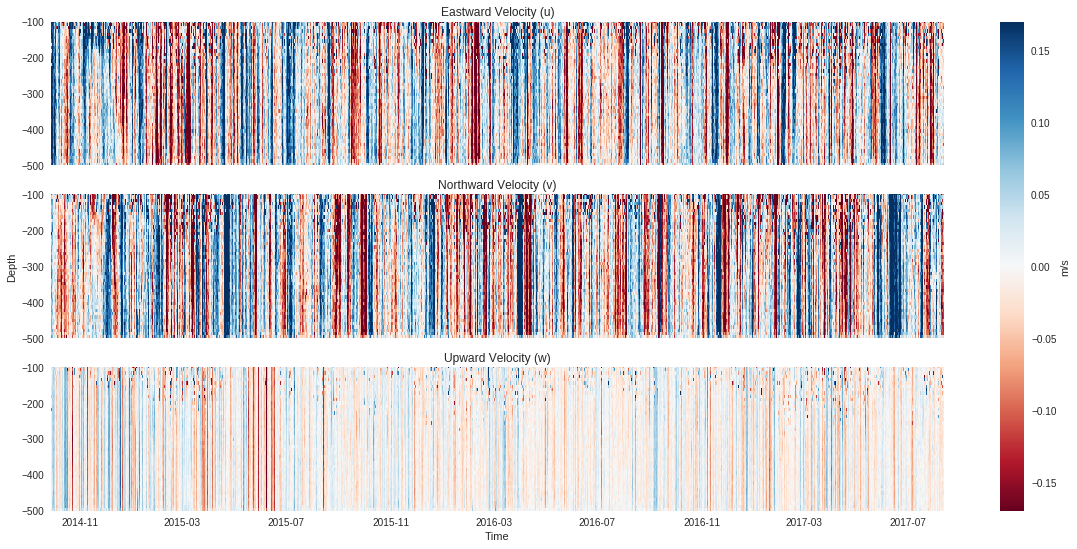

In [0]:
plot_ADCP_data(time_A,bin_depths_A,east_A,north_A,up_A)

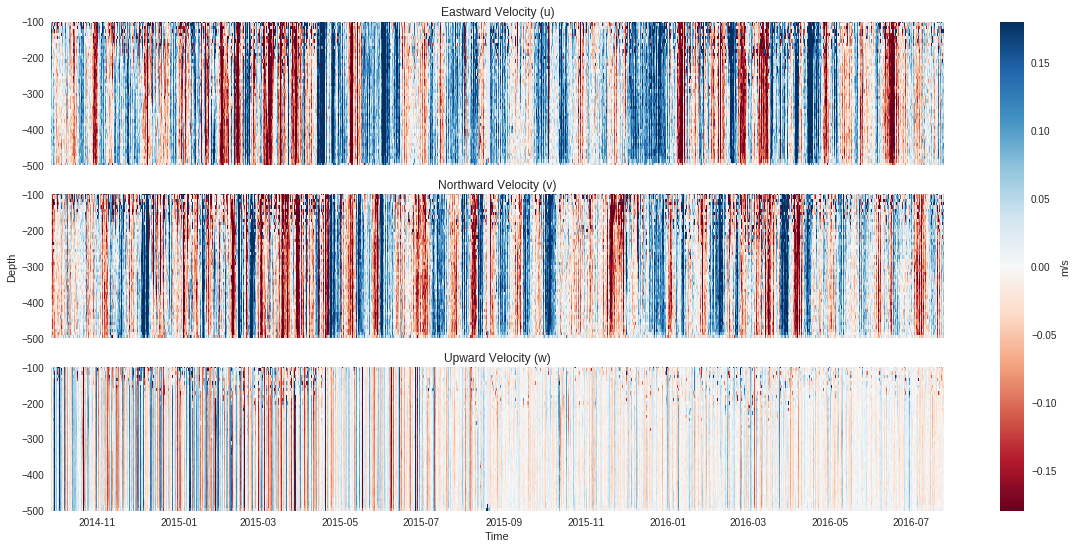

In [0]:
plot_ADCP_data(time_B,bin_depths_B,east_B,north_B,up_B)

In [0]:
time_B[0:100]


array(['2014-09-27T11:00:00.000000000', '2014-09-27T12:00:00.000000000',
       '2014-09-27T13:00:00.000000000', '2014-09-27T14:00:00.000000000',
       '2014-09-27T15:00:00.000000000', '2014-09-27T16:00:00.000000000',
       '2014-09-27T17:00:00.000000000', '2014-09-27T18:00:00.000000000',
       '2014-09-27T19:00:00.000000000', '2014-09-27T20:00:00.000000000',
       '2014-09-27T21:00:00.000000000', '2014-09-27T22:00:00.000000000',
       '2014-09-27T23:00:00.000000000', '2014-09-28T00:00:00.000000000',
       '2014-09-28T01:00:00.000000000', '2014-09-28T02:00:00.000000000',
       '2014-09-28T03:00:00.000000000', '2014-09-28T04:00:00.000000000',
       '2014-09-28T05:00:00.000000000', '2014-09-28T06:00:00.000000000',
       '2014-09-28T07:00:00.000000000', '2014-09-28T08:00:00.000000000',
       '2014-09-28T09:00:00.000000000', '2014-09-28T10:00:00.000000000',
       '2014-09-28T11:00:00.000000000', '2014-09-28T12:00:00.000000000',
       '2014-09-28T13:00:00.000000000', '2014-09-28

Next we compute correlation and spectrum between each beam between two instruments.
For correlation we first interpolate data from one instrument onto timeframe of another instrument
Then we fill NaN values and run a running mean of 100 hours on data.

The correlation values do not show high values, but we can see from the timeseries plots that the data btween each instrument is pretty coherent. This is also confirmed by comparison of the Power Spectral Density (PSD) for datasets from two intruments. The PSD shapes are very close between each moorings and show a spike around 300 day period.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in reciprocal


0 0.3691606116356548
1 0.3717345418860945
2 0.3630071814190811
3 0.35817467885315535
4 0.36713577517548324
5 0.36286432075695474
6 0.36195724741241014
7 0.35849666651225587
8 0.36122381253362074
9 0.354400768051627


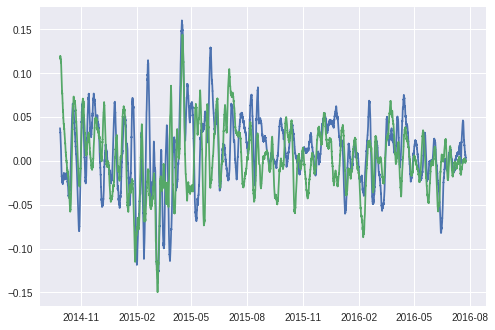

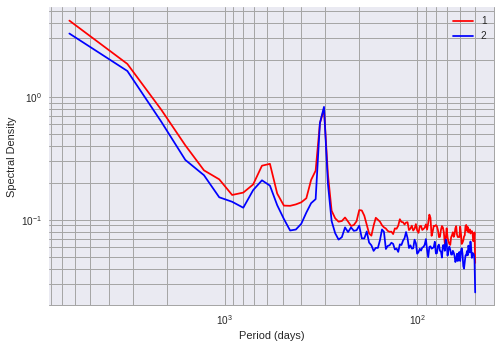

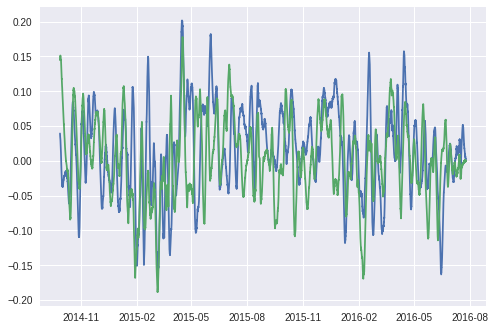

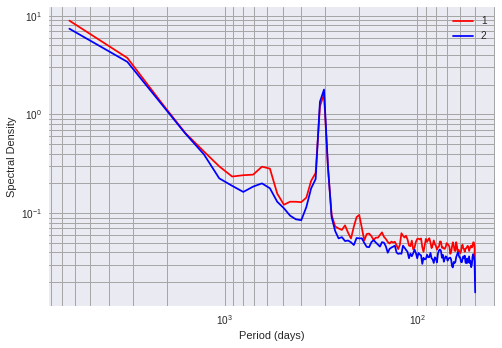

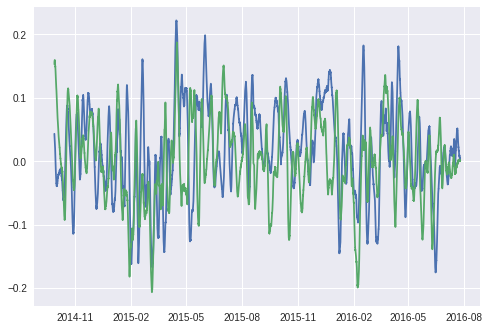

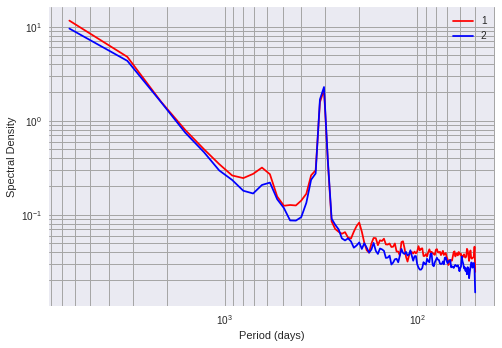

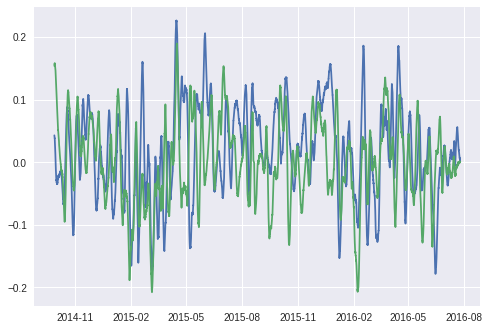

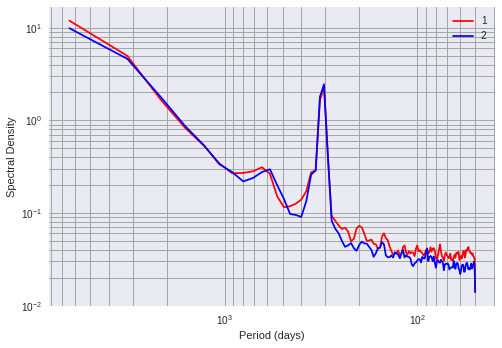

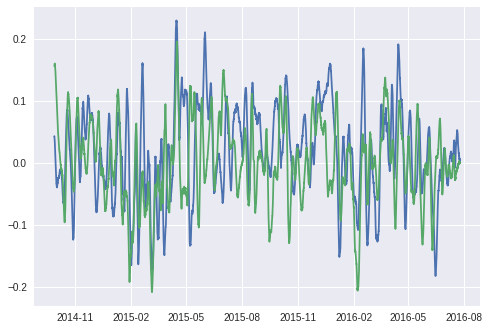

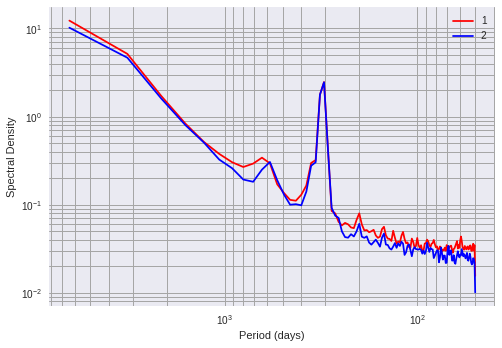

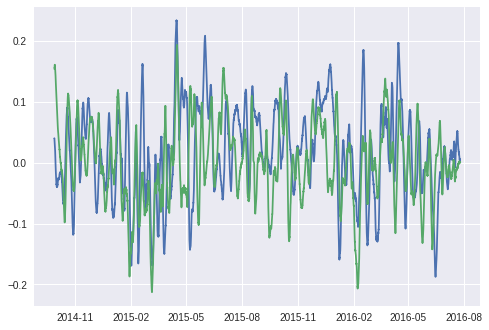

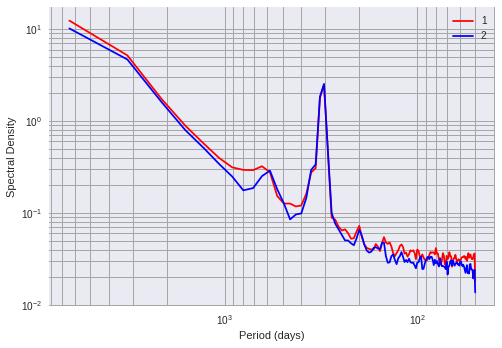

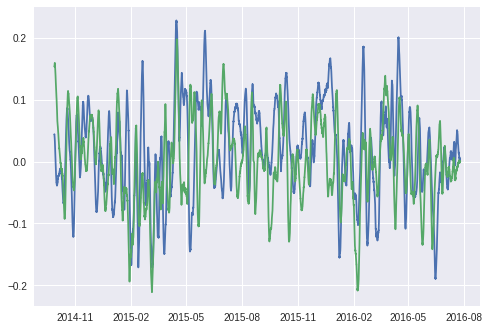

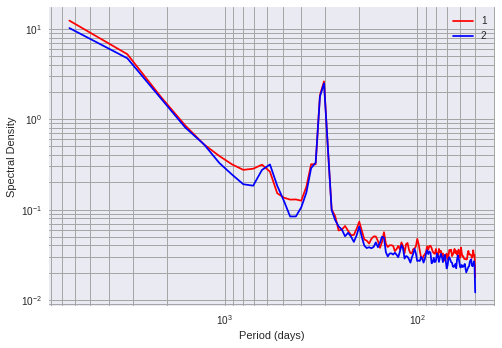

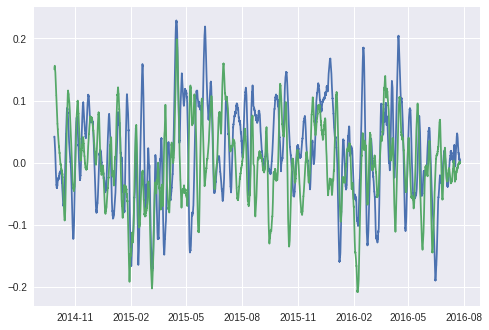

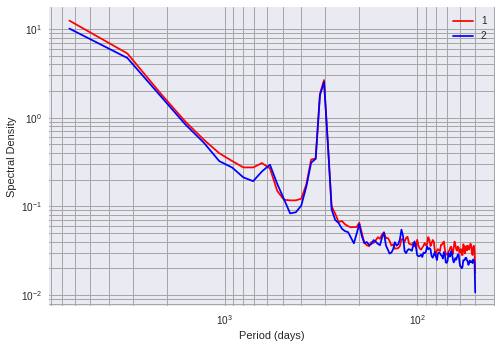

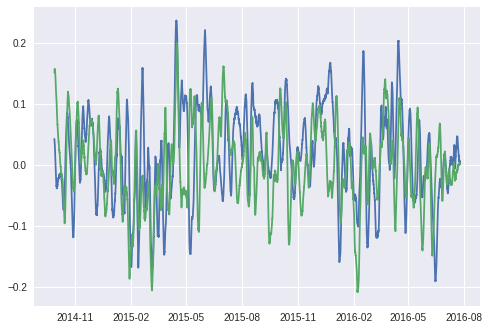

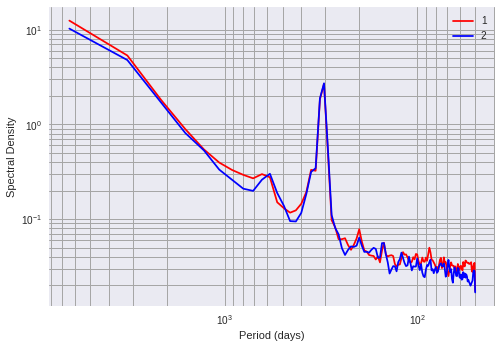

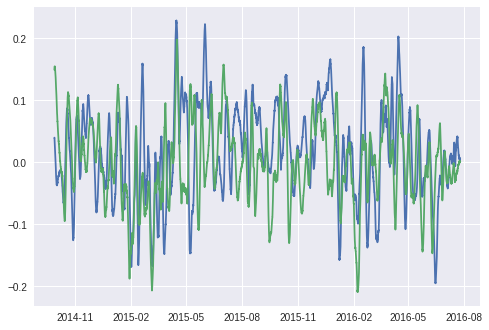

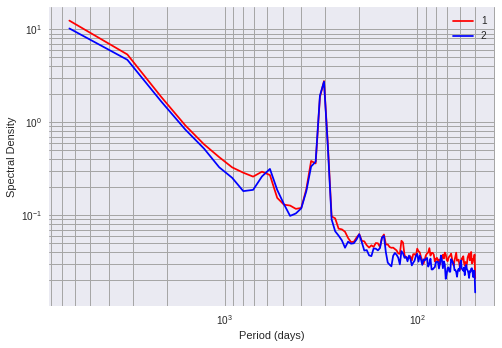

In [0]:
def fill_nan(A):
    '''
    interpolate to fill nan values
    '''
    inds = np.arange(A.shape[0])
    good = np.where(np.isfinite(A))
    f = interpolate.interp1d(inds[good], A[good],bounds_error=False)
    B = np.where(np.isfinite(A),A,f(inds))
    return B

  
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]
  
  
def plot_PSD_welch(y, fq, c,l):
    from scipy import signal
    plt.grid(True,which="both",ls="-", color='0.65')
    f,PSD = signal.welch(y,float(fq))
    x=np.linspace(1,len(y)/2+1,len(y)/2+1)
    x=f**(-1)
    x=x
    plt.loglog(x,PSD, color=c, label=l)
    plt.legend(loc='best')
    plt.xlabel('Period (days)')
    plt.ylabel('Spectral Density')
    #plt.gca().invert_xaxis()
    #plt.show()
    return x,PSD
  
  
import scipy.interpolate as interpolate
from numpy import nan
ds_A.dims['bin']
ds_A.dims['time']

test_a=pd.to_numeric(ds_A['time'].values, errors='coerce')
test_b=pd.to_numeric(ds_B['time'].values, errors='coerce')

#check first 20 bins
for i in range(10):

  #print east_A.shape, time_A[0],time_B[0]
  east_A_new=np.asarray(east_A[i,:])
  #print time_B.values
  #new_B=np.interp(test_b, test_a, east_A_new)
  #print np.asarray(test_a[:])
  interp_data = interpolate.interp1d(np.asarray(test_a), fill_nan(east_A_new),  kind='cubic',  bounds_error=None)#, fill_value=nan)
  #interp_data = interpolate.interp1d(time_A, east_A[:,0], kind='cubic',  bounds_error=None)#, fill_value=nan)

  new_dat = interp_data(np.asarray(test_b))
  #print new_B.shape


  #plt.plot(time_A)
  fig=plt.figure()
  plt.plot(time_B,runningMeanFast(fill_nan(east_B[i,:]),100))
  plt.plot(time_B,runningMeanFast(fill_nan(new_dat),100))
  r=np.corrcoef(runningMeanFast(fill_nan(east_B[i,:]),100), runningMeanFast(fill_nan(new_dat),100))
  fig=plt.figure()
  plot_PSD_welch(fill_nan(east_B[i,:]),float(24),'r', '1')
  plot_PSD_welch(fill_nan(new_dat),float(24),'b', '2')
  plt.gca().invert_xaxis()
#slope, intercept, r_value, p_value, std_err = stats.linregress(east_B[1,:], new_dat)
  print i,r[0,1]

Next we check time series of pressure data from two instruments. We can observe that the pressure time series are very coherent between mooring A and mooring B ADCPs

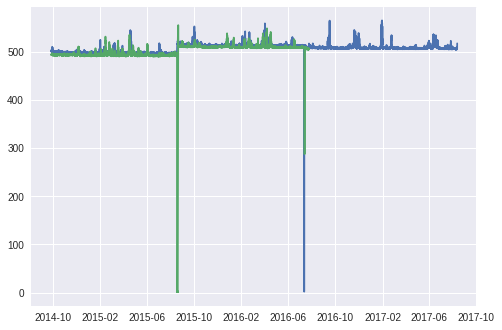

In [0]:
#check pressure between two instruments
plt.plot(time_A,pressure_A/1000)
plt.plot(time_B,pressure_B/1000)

Next we are interested in checking the signal quality parameters of ADCP data. First two plots show the bad beam data for each deployment. We can observe that the closer to the surface the data are the higher amount of bad beams dataset contains

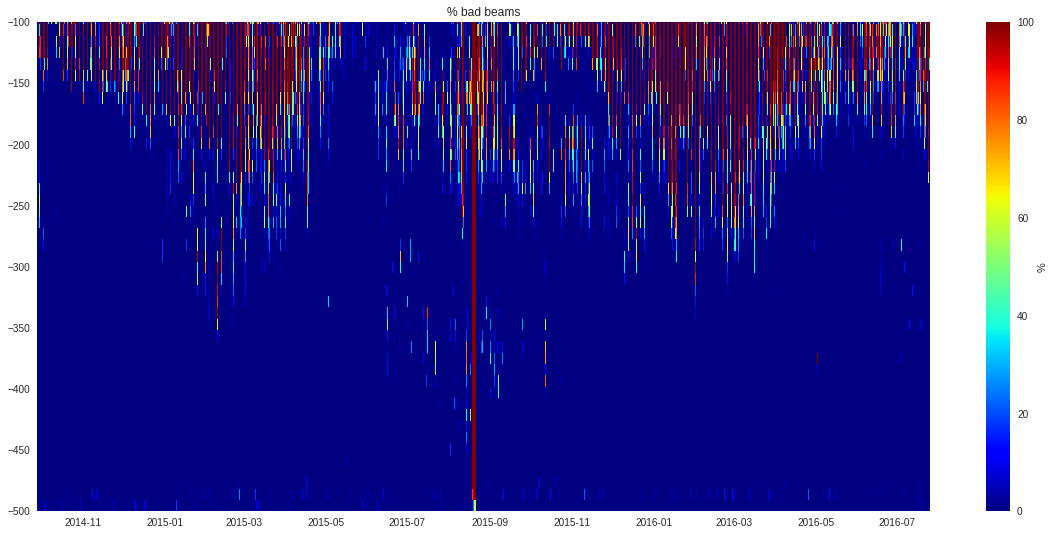

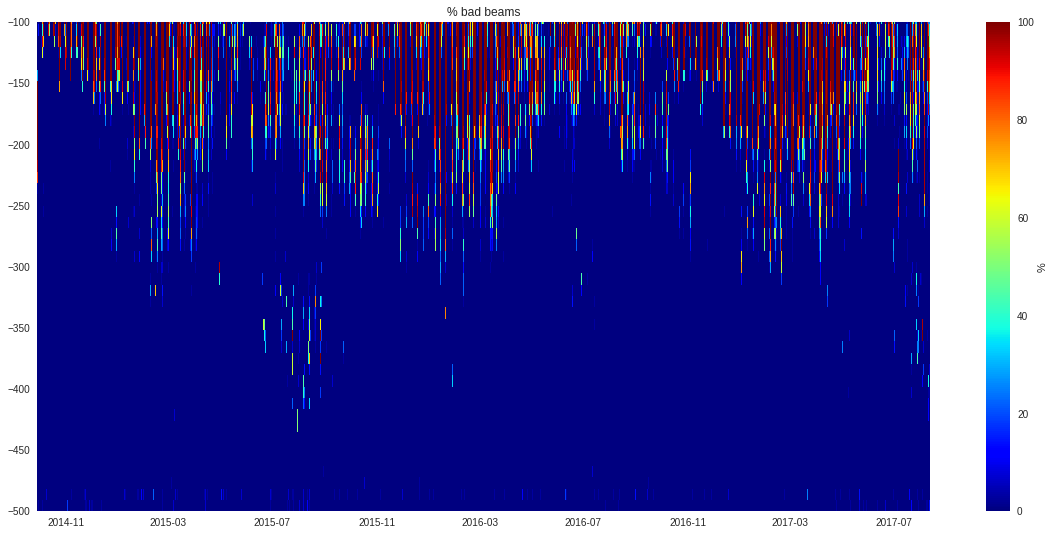

In [0]:
plot_ADCP_data(time_B,bin_depths_B,bad_beams_B)
plot_ADCP_data(time_A,bin_depths_A,bad_beams_A)

The similar is relevant to beam signal correlation and beam echo inensity, as the data within the beam is rejected based on these two parameters. However sometimes user might want to use different rejection treshold, thus it is useful to analyze plots of these two parameters separately for each beam.

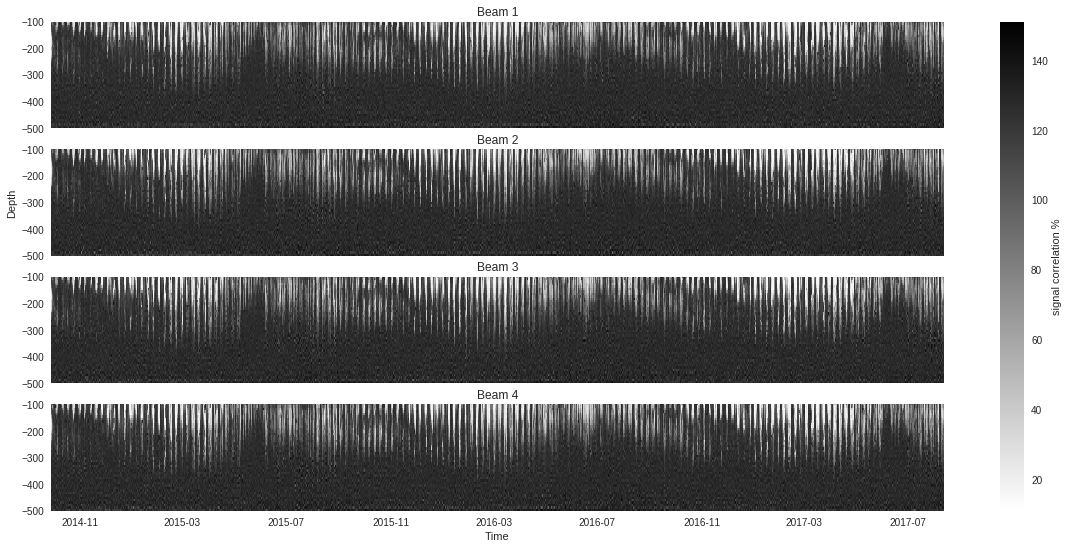

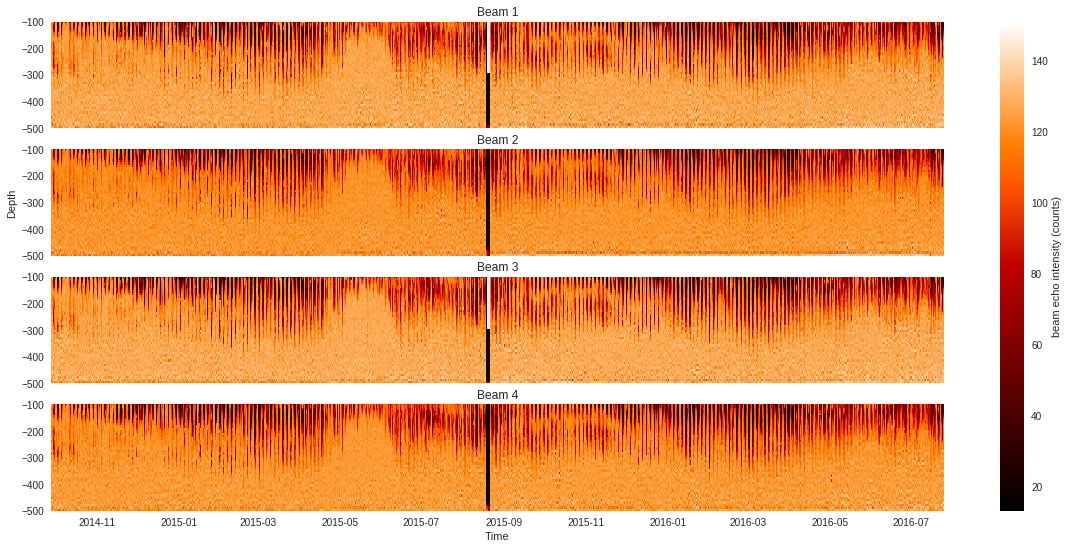

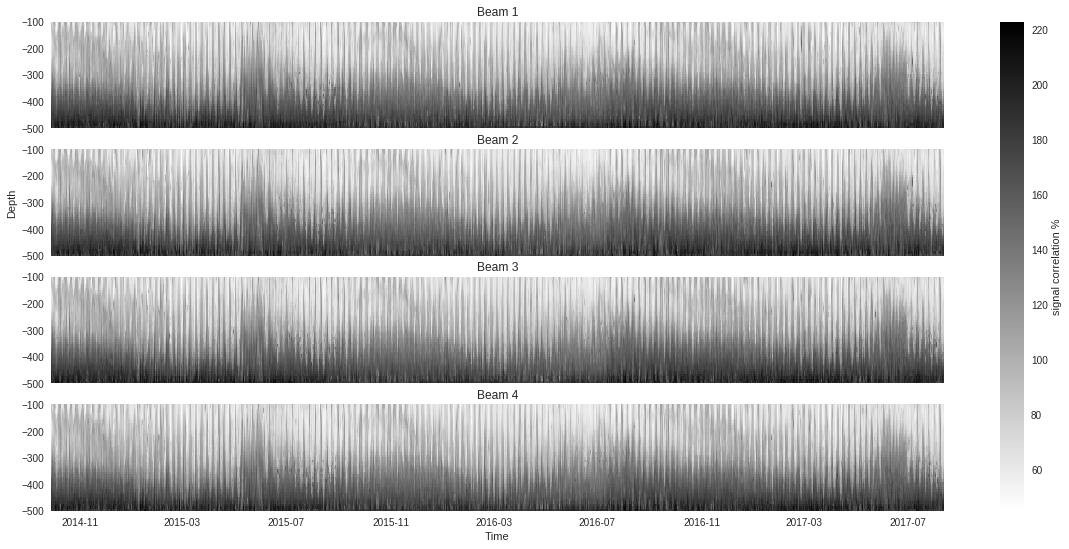

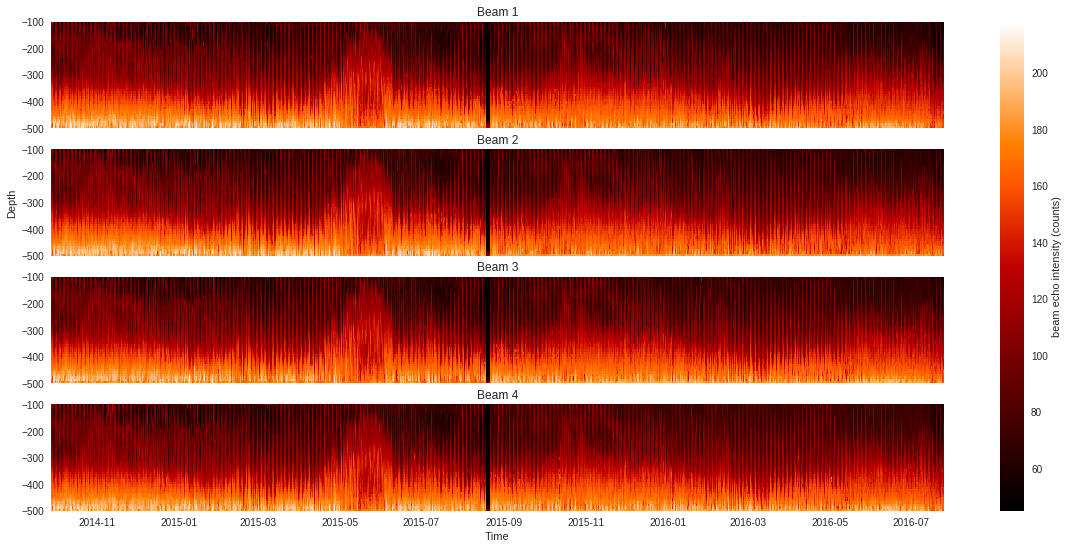

In [0]:
cor_1_A = ds_A['correlation_magnitude_beam1'].data.T
cor_2_A = ds_A['correlation_magnitude_beam2'].data.T
cor_3_A = ds_A['correlation_magnitude_beam3'].data.T
cor_4_A = ds_A['correlation_magnitude_beam4'].data.T

cor_1_B = ds_B['correlation_magnitude_beam1'].data.T
cor_2_B = ds_B['correlation_magnitude_beam2'].data.T
cor_3_B = ds_B['correlation_magnitude_beam3'].data.T
cor_4_B = ds_B['correlation_magnitude_beam4'].data.T

echo_1_A = ds_A['echo_intensity_beam1'].data.T
echo_2_A = ds_A['echo_intensity_beam2'].data.T
echo_3_A = ds_A['echo_intensity_beam3'].data.T
echo_4_A = ds_A['echo_intensity_beam4'].data.T

echo_1_B = ds_B['echo_intensity_beam1'].data.T
echo_2_B = ds_B['echo_intensity_beam2'].data.T
echo_3_B = ds_B['echo_intensity_beam3'].data.T
echo_4_B = ds_B['echo_intensity_beam4'].data.T


plot_ADCP_data(time_A,bin_depths_A,cor_1_A,cor_2_A,cor_3_A,cor_4_A, 'gist_yarg', 'signal correlation %')
plot_ADCP_data(time_B,bin_depths_B,cor_1_B,cor_2_B,cor_3_B,cor_4_B, 'gist_heat','beam echo intensity (counts)')

plot_ADCP_data(time_A,bin_depths_A,echo_1_A,echo_2_A,echo_3_A,echo_4_A, 'gist_yarg', 'signal correlation %')
plot_ADCP_data(time_B,bin_depths_B,echo_1_B,echo_2_B,echo_3_B,echo_4_B, 'gist_heat','beam echo intensity (counts)')


## 6.Conclusions

Based on this (somewhat cursory) analysis of the Irminger Flanking Mooring A and Mooring B ADCP data, we note the following takeaways:
* In general, the east and north velocity components during deployment look largely reasonable.  There are no major outliers.
* The data seem to align between two instruments. However there should be precaution taken into account, when using the data:
  * Vertical velocity fluctuations seem to be unresolved by ADCP data.
  * The low sampling rate of the profilers
  * Additional verification of velocity data using cruise data would be benefitial
  
